<a href="https://colab.research.google.com/github/Calabrese404/DataMiningProject/blob/main/Data_understanding_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data understanding

In [1]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict
from scipy.stats.stats import pearsonr
import seaborn as sns

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler



In [2]:
#Read a file by Input 
import io
from google.colab import files
uploaded = files.upload()

Saving seismic-bumps.csv to seismic-bumps.csv


In [3]:
df = pd.read_csv(io.BytesIO(uploaded['seismic-bumps.csv']))

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2584 entries, 0 to 2583
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   seismic         2584 non-null   object
 1   seismoacoustic  2584 non-null   object
 2   shift           2584 non-null   object
 3   genergy         2584 non-null   int64 
 4   gpuls           2584 non-null   int64 
 5   gdenergy        2584 non-null   int64 
 6   gdpuls          2584 non-null   int64 
 7   hazard          2584 non-null   object
 8   nbumps          2584 non-null   int64 
 9   nbumps2         2584 non-null   int64 
 10  nbumps3         2584 non-null   int64 
 11  nbumps4         2584 non-null   int64 
 12  nbumps5         2584 non-null   int64 
 13  nbumps6         2584 non-null   int64 
 14  nbumps7         2584 non-null   int64 
 15  nbumps89        2584 non-null   int64 
 16  energy          2584 non-null   int64 
 17  maxenergy       2584 non-null   int64 
 18  class   

In [ ]:
num_attr = ['genergy','gpuls','gdenergy','gdpuls','nbumps','nbumps2','nbumps3','nbumps4','nbumps5','nbumps6','nbumps7',
            'nbumps89','energy','maxenergy']
cat_attr = ['seismic','seismoacoustic','shift','hazard']

### Target variable

([<matplotlib.patches.Wedge at 0x7f4f7a5c8b10>,
 [Text(-1.0765885387590415, 0.2257368339741482, 'Non-hazardous state'),
  Text(1.2723319219313702, -0.2667798351345652, 'Hazardous state')],
 [Text(-0.5872301120503861, 0.12312918216771719, '93.42%'),
  Text(0.7829734904193048, -0.1641722062366555, '6.58%')])

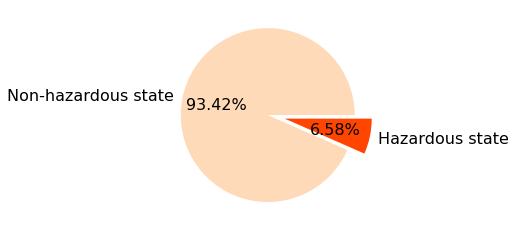

In [ ]:
# pie chart per target variable
type_counts=df['class'].value_counts() 
plt.pie(type_counts, explode=(0,0.2), labels = ('Non-hazardous state','Hazardous state'), autopct='%1.2f%%',
        shadow=False, colors=('peachpuff','orangered'), textprops={'fontsize': 16})

### Numerical variables stats

In [ ]:
# summary stats di variabili numeriche
df[num_attr].describe()

,genergy,gpuls,gdenergy,gdpuls,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy
count,2.584000e+03,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.0,2584.0,2584.0,2584.000000,2584.000000
mean,9.024252e+04,538.579334,12.375774,4.508901,0.859520,0.393576,0.392802,0.067724,0.004644,0.0,0.0,0.0,4975.270898,4278.850619
std,2.292005e+05,562.652536,80.319051,63.166556,1.364616,0.783772,0.769710,0.279059,0.068001,0.0,0.0,0.0,20450.833222,19357.454882
min,1.000000e+02,2.000000,-96.000000,-96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
25%,1.166000e+04,190.000000,-37.000000,-36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
50%,2.548500e+04,379.000000,-6.000000,-6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
75%,5.283250e+04,669.000000,38.000000,30.250000,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,2600.000000,2000.000000
max,2.595650e+06,4518.000000,1245.000000,838.000000,9.000000,8.000000,7.000000,3.000000,1.000000,0.0,0.0,0.0,402000.000000,400000.000000


### Categorical variables stats

In [ ]:
# stats di variabili categoriche
for attr in cat_attr:
    print(f"**{attr}\n{df[attr].describe()}")
    print(f"\n{attr} Classes")
    print(df[attr].value_counts(normalize=True))
    print(df[attr].value_counts(normalize=False))
    print(f"\n\n")

**seismic
count     2584
unique       2
top          a
freq      1682
Name: seismic, dtype: object

seismic Classes
a    0.650929
b    0.349071
Name: seismic, dtype: float64
a    1682
b     902
Name: seismic, dtype: int64



**seismoacoustic
count     2584
unique       3
top          a
freq      1580
Name: seismoacoustic, dtype: object

seismoacoustic Classes
a    0.611455
b    0.369969
c    0.018576
Name: seismoacoustic, dtype: float64
a    1580
b     956
c      48
Name: seismoacoustic, dtype: int64



**shift
count     2584
unique       2
top          W
freq      1663
Name: shift, dtype: object

shift Classes
W    0.643576
N    0.356424
Name: shift, dtype: float64
W    1663
N     921
Name: shift, dtype: int64



**hazard
count     2584
unique       3
top          a
freq      2342
Name: hazard, dtype: object

hazard Classes
a    0.906347
b    0.082043
c    0.011610
Name: hazard, dtype: float64
a    2342
b     212
c      30
Name: hazard, dtype: int64





In [ ]:
# summary stats di variabili categoriche
df[cat_attr].describe()

,seismic,seismoacoustic,shift,hazard
count,2584,2584,2584,2584
unique,2,3,2,3
top,a,a,W,a
freq,1682,1580,1663,2342


### Histograms & boxplots (numerical variables)

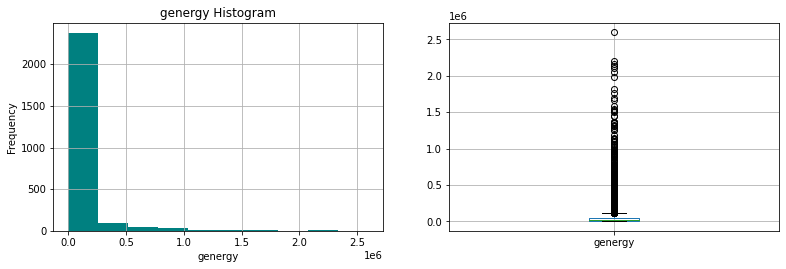

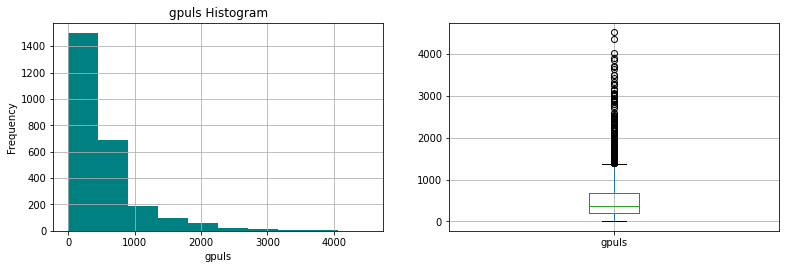

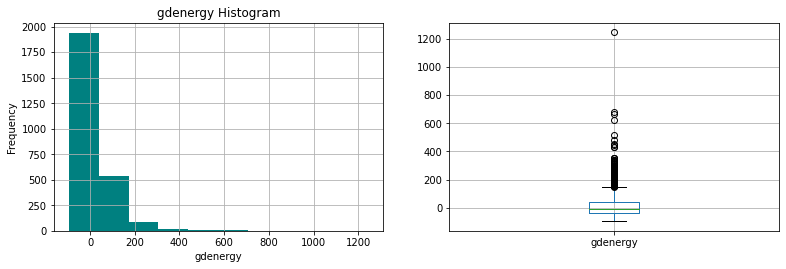

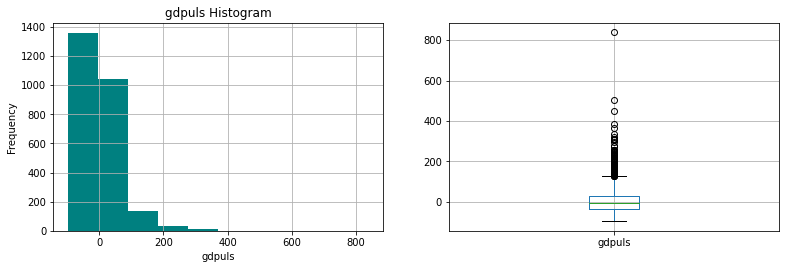

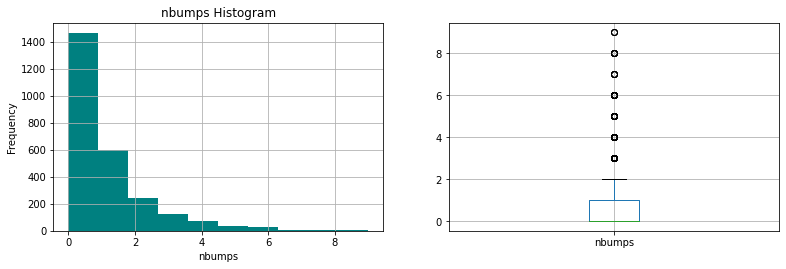

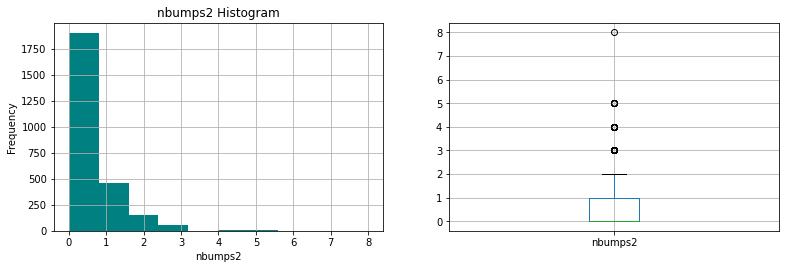

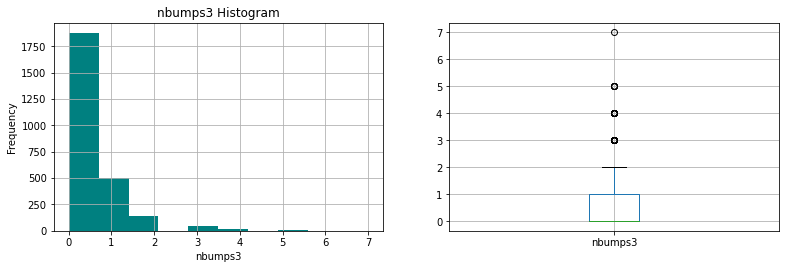

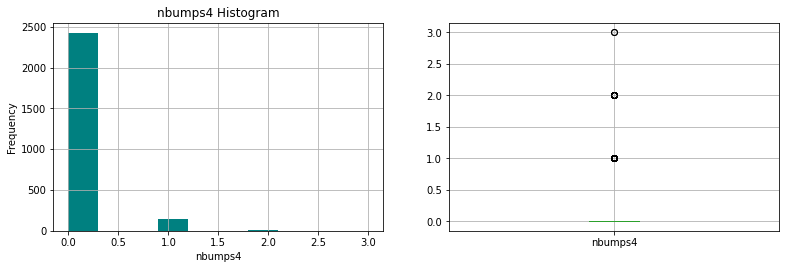

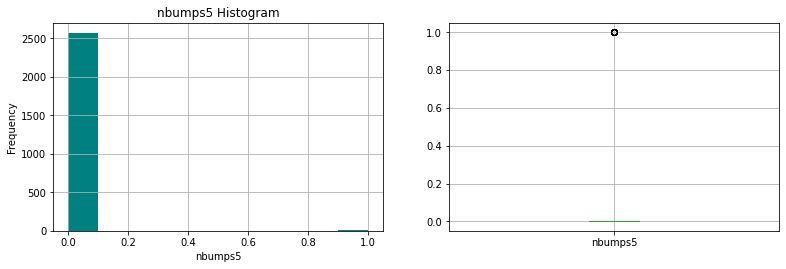

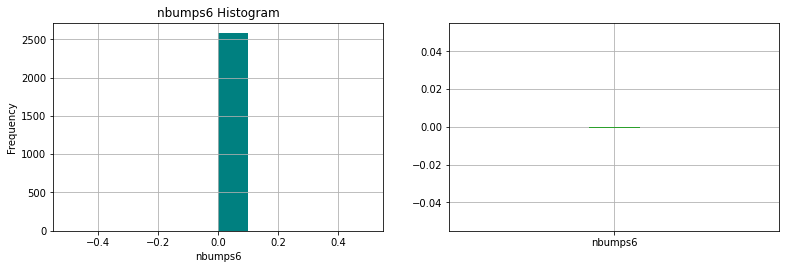

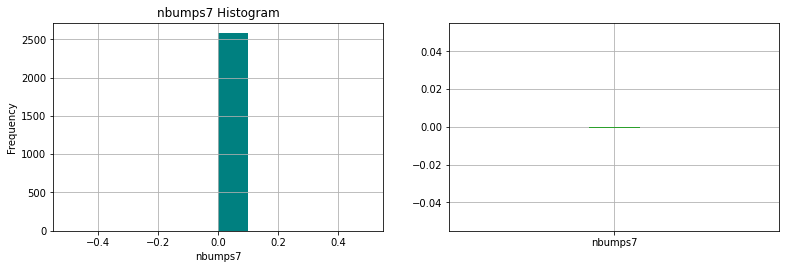

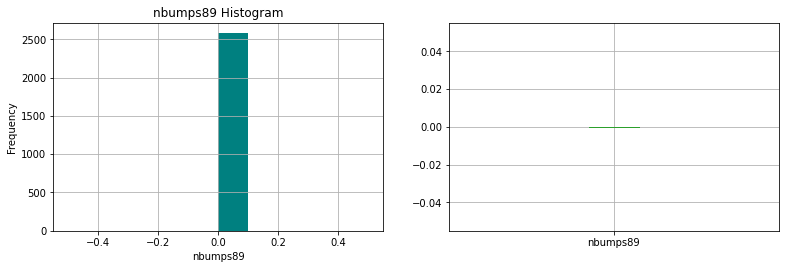

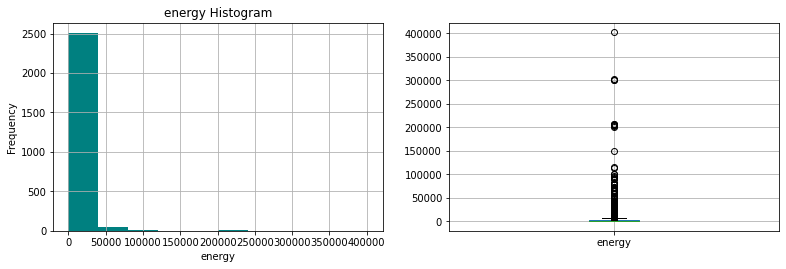

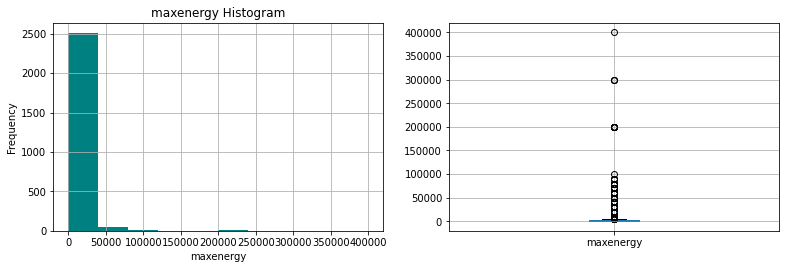

In [ ]:
# Histograms & boxplots di tutti gli attributi numerici 

for attr in num_attr:            
    fig = plt.figure(figsize=(13, 13)) 
    fig_dims = (3, 2)
    
    #Histogram
    plt.subplot2grid(fig_dims, (0, 0))
    df[attr].hist(color='teal')
    plt.title(attr+ " Histogram")
    plt.xlabel(attr)
    plt.ylabel('Frequency')

    #Boxplot
    plt.subplot2grid(fig_dims, (0, 1))
    df.boxplot(column=[attr])

### Bar charts (categorical variables)

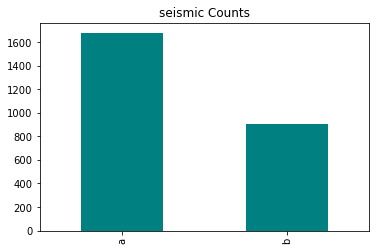

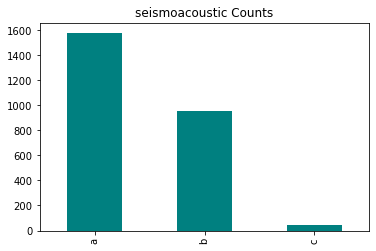

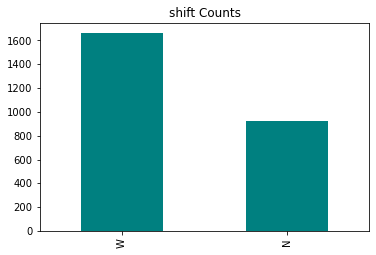

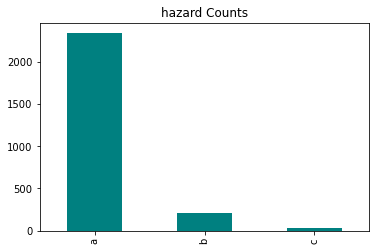

In [ ]:
# Bar charts di tutti gli attributi categorici

for attr in cat_attr:            
    fig = plt.figure(figsize=(13, 13)) 
    fig_dims = (3, 2)
    
    #Bar Charts
    plt.subplot2grid(fig_dims, (0, 0))
    df[attr].value_counts().plot(kind='bar',title=attr+" Counts", color='teal')

<AxesSubplot:title={'center':' Seismic Bar Chart'}>

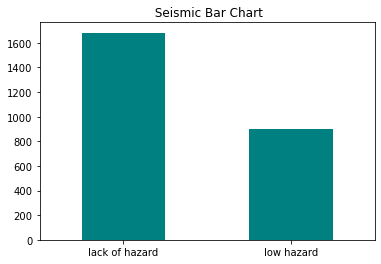

In [ ]:
# Seismic Bar chart
perf_dict = {'a':"lack of hazard", 'b':"low hazard", 'c':"high hazard", 'd':"danger state"}
tmp=df["seismic"].value_counts(sort=True).rename(index=perf_dict)
tmp.plot(kind='bar',title=" Seismic Bar Chart",rot=0, color='teal')

Text(0, 0.5, '%')

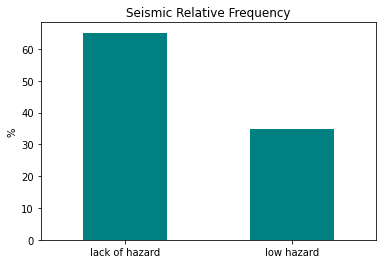

In [ ]:
# Seismic relative frequency
a=df['seismic'].value_counts() * 100 /len(df['seismic'])
perf_dict = {'a':"lack of hazard", 'b':"low hazard", 'c':"high hazard", 'd':"danger state"}
tmp=a.rename(index=perf_dict)
tmp.plot(kind='bar',title="Seismic Relative Frequency",rot=0, color='teal')
plt.ylabel('%')

<AxesSubplot:title={'center':'Seismoacoustic Bar Chart'}>

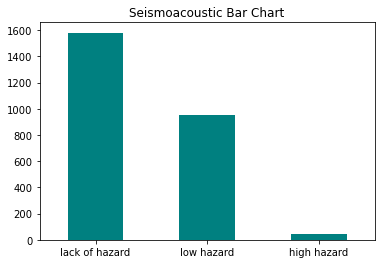

In [ ]:
# Seismoacoustic bar chart
tmp=df["seismoacoustic"].value_counts(sort=True).rename(index=perf_dict)
tmp.plot(kind='bar',title="Seismoacoustic Bar Chart",rot=0, color='teal')

<AxesSubplot:title={'center':'Shift Bar Chart'}>

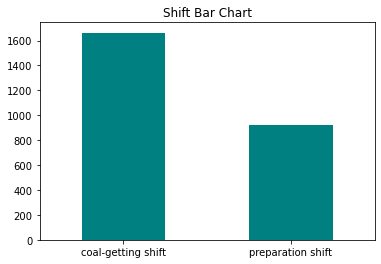

In [ ]:
# Shift bar chart
shift_dict={'N':'preparation shift','W':'coal-getting shift'}
tmp=df["shift"].value_counts(sort=True).rename(index=shift_dict)
tmp.plot(kind='bar',title="Shift Bar Chart",rot=0, color='teal')

<AxesSubplot:title={'center':'Hazard Bar Chart'}>

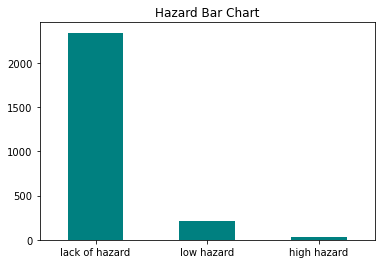

In [ ]:
# Hazard bar chart
tmp=df["hazard"].value_counts(sort=True).rename(index=perf_dict)
tmp.plot(kind='bar',title="Hazard Bar Chart",rot=0, color='teal')

### Variables by class

class       0   1
seismic          
a        1599  83
b         815  87


Text(0, 0.5, 'Class')

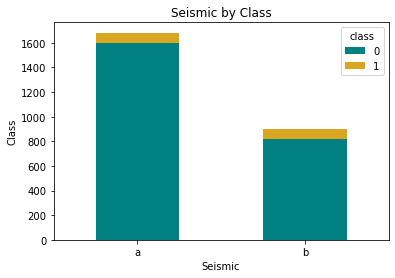

In [ ]:
# Seismic x class 
xt = pd.crosstab(df['seismic'],df['class'])
print(xt)
xt.plot(kind='bar', stacked=True, rot=0, color=('teal','goldenrod'))
plt.title('Seismic by Class')
plt.xlabel('Seismic')
plt.ylabel('Class')


class              0    1
seismoacoustic           
a               1479  101
b                890   66
c                 45    3


Text(0, 0.5, 'Class')

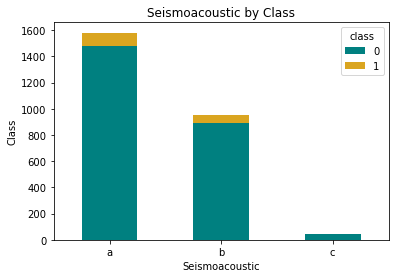

In [ ]:
# Seismoacoustic x class 
xt = pd.crosstab(df['seismoacoustic'],df['class'])
print(xt)
xt.plot(kind='bar', stacked=True, rot=0, color=('teal','goldenrod'))
plt.title('Seismoacoustic by Class')
plt.xlabel('Seismoacoustic')
plt.ylabel('Class')

class     0    1
shift           
N       904   17
W      1510  153


Text(0, 0.5, 'Class')

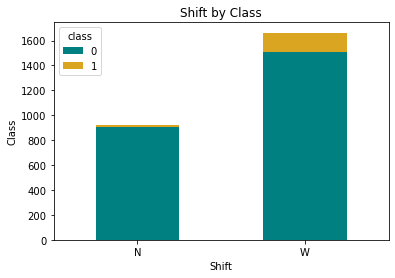

In [ ]:
# Shift x class 
xt = pd.crosstab(df['shift'],df['class'])
print(xt)
xt.plot(kind='bar', stacked=True, rot=0, color=('teal','goldenrod'))
plt.title('Shift by Class')
plt.xlabel('Shift')
plt.ylabel('Class')

class      0    1
hazard           
a       2186  156
b        198   14
c         30    0


Text(0, 0.5, 'Class')

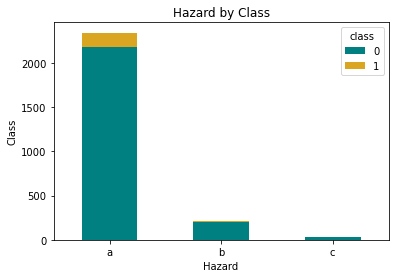

In [ ]:
# Hazard x class 
xt = pd.crosstab(df['hazard'],df['class'])
print(xt)
xt.plot(kind='bar', stacked=True, rot=0, color=('teal','goldenrod'))
plt.title('Hazard by Class')
plt.xlabel('Hazard')
plt.ylabel('Class')

Text(0, 0.5, 'Count')

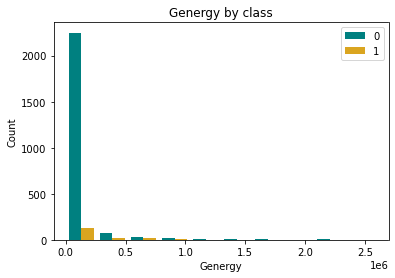

In [ ]:
# genergy x class histogram
df1=df[df['class'] == 0]['genergy']
df2=df[df['class'] == 1]['genergy']
plt.hist([df1, df2],stacked=False,color=('teal','goldenrod'))
plt.legend(('0', '1'), loc='best')
plt.title('Genergy by class')
plt.xlabel('Genergy')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

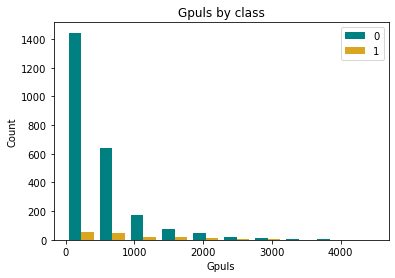

In [ ]:
# gpuls x class histogram
df1=df[df['class'] == 0]['gpuls']
df2=df[df['class'] == 1]['gpuls']
plt.hist([df1, df2],stacked=False,color=('teal','goldenrod'))
plt.legend(('0', '1'), loc='best')
plt.title('Gpuls by class')
plt.xlabel('Gpuls')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

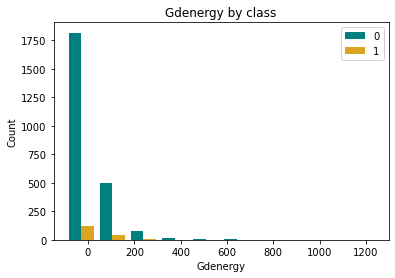

In [ ]:
# gdenergy x class histogram
df1=df[df['class'] == 0]['gdenergy']
df2=df[df['class'] == 1]['gdenergy']
plt.hist([df1, df2],stacked=False,color=('teal','goldenrod'))
plt.legend(('0', '1'), loc='best')
plt.title('Gdenergy by class')
plt.xlabel('Gdenergy')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

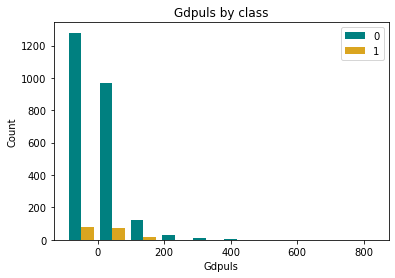

In [ ]:
# gdpuls x class histogram
df1=df[df['class'] == 0]['gdpuls']
df2=df[df['class'] == 1]['gdpuls']
plt.hist([df1, df2],stacked=False,color=('teal','goldenrod'))
plt.legend(('0', '1'), loc='best')
plt.title('Gdpuls by class')
plt.xlabel('Gdpuls')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

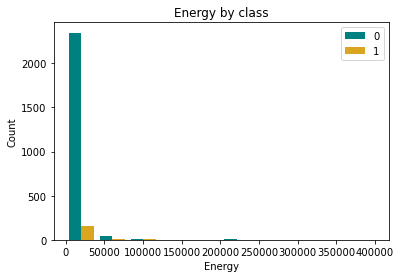

In [ ]:
# energy x class histogram
df1=df[df['class'] == 0]['energy']
df2=df[df['class'] == 1]['energy']
plt.hist([df1, df2],stacked=False,color=('teal','goldenrod'))
plt.legend(('0', '1'), loc='best')
plt.title('Energy by class')
plt.xlabel('Energy')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

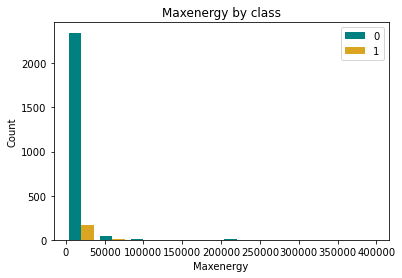

In [ ]:
# maxenergy x class histogram
df1=df[df['class'] == 0]['maxenergy']
df2=df[df['class'] == 1]['maxenergy']
plt.hist([df1, df2],stacked=False,color=('teal','goldenrod'))
plt.legend(('0', '1'), loc='best')
plt.title('Maxenergy by class')
plt.xlabel('Maxenergy')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

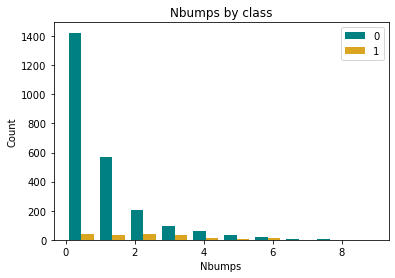

In [ ]:
# nbumps x class histogram
df1=df[df['class'] == 0]['nbumps']
df2=df[df['class'] == 1]['nbumps']
plt.hist([df1, df2],stacked=False,color=('teal','goldenrod'))
plt.legend(('0', '1'), loc='best')
plt.title('Nbumps by class')
plt.xlabel('Nbumps')
plt.ylabel('Count')

class           0         1
seismic                    
a        0.950654  0.049346
b        0.903548  0.096452


Text(0, 0.5, 'Class (%)')

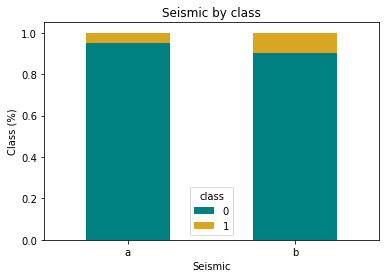

In [ ]:
########## NORMALIZED ###########
#################################

# Seismic x class bar chart normalized
attr='seismic'
pclass_xt = pd.crosstab(df[attr], df['class'])
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)
print(pclass_xt_pct)
pclass_xt_pct.plot(kind='bar', stacked=True,title="Seismic by class",rot=0,color=('teal','goldenrod'))
plt.xlabel('Seismic')
plt.ylabel('Class (%)')

class                  0         1
seismoacoustic                    
a               0.936076  0.063924
b               0.930962  0.069038
c               0.937500  0.062500


Text(0, 0.5, 'Class (%)')

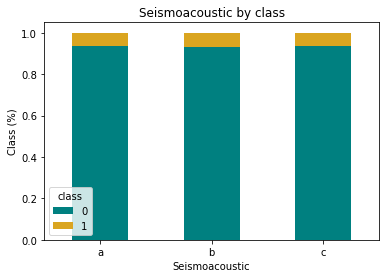

In [ ]:
# Seismoacoustic x class bar chart normalized
attr='seismoacoustic'
pclass_xt = pd.crosstab(df[attr], df['class'])
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)
print(pclass_xt_pct)
pclass_xt_pct.plot(kind='bar', stacked=True,title="Seismoacoustic by class",rot=0,color=('teal','goldenrod'))
plt.xlabel('Seismoacoustic')
plt.ylabel('Class (%)')

class         0         1
shift                    
N      0.981542  0.018458
W      0.907998  0.092002


Text(0, 0.5, 'Class (%)')

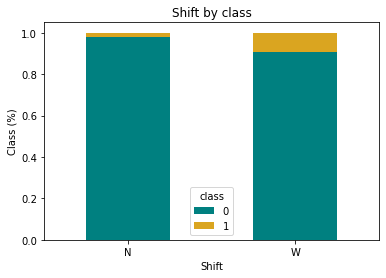

In [ ]:
# Shift x class bar chart normalized
attr='shift'
pclass_xt = pd.crosstab(df[attr], df['class'])
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)
print(pclass_xt_pct)
pclass_xt_pct.plot(kind='bar', stacked=True,title="Shift by class",rot=0,color=('teal','goldenrod'))
plt.xlabel('Shift')
plt.ylabel('Class (%)')

class          0         1
hazard                    
a       0.933390  0.066610
b       0.933962  0.066038
c       1.000000  0.000000


Text(0, 0.5, 'Class (%)')

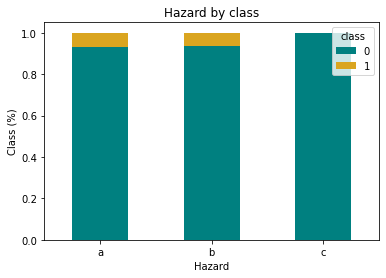

In [ ]:
# Hazard x class bar chart normalized
attr='hazard'
pclass_xt = pd.crosstab(df[attr], df['class'])
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)
print(pclass_xt_pct)
pclass_xt_pct.plot(kind='bar', stacked=True,title="Hazard by class",rot=0,color=('teal','goldenrod'))
plt.xlabel('Hazard')
plt.ylabel('Class (%)')

### Missing values

In [ ]:
df.isna().any()  # non ci sono missing values

seismic           False
seismoacoustic    False
shift             False
genergy           False
gpuls             False
gdenergy          False
gdpuls            False
hazard            False
nbumps            False
nbumps2           False
nbumps3           False
nbumps4           False
nbumps5           False
nbumps6           False
nbumps7           False
nbumps89          False
energy            False
maxenergy         False
class             False
dtype: bool

### Heatmap

Text(0.5, 1.0, 'Heatmap')

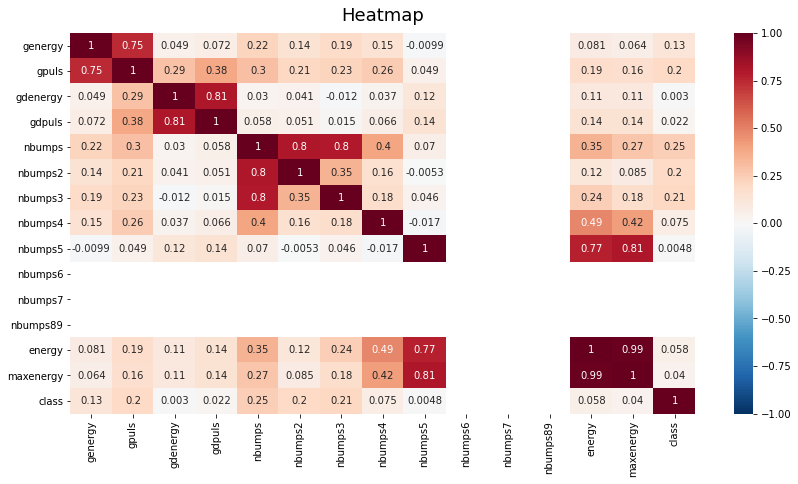

In [ ]:
# Heatmap (correlation matrix) 
corr = df.corr()
plt.figure(figsize=(14, 7))
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, cmap='RdBu_r', annot=True)
heatmap.set_title('Heatmap', fontdict={'fontsize':18}, pad=12)

In [ ]:
df1=df
df1.drop(["nbumps6", "nbumps7", "nbumps89"], axis=1,inplace=True)
corr = df1.corr()

Text(0.5, 1.0, 'Heatmap')

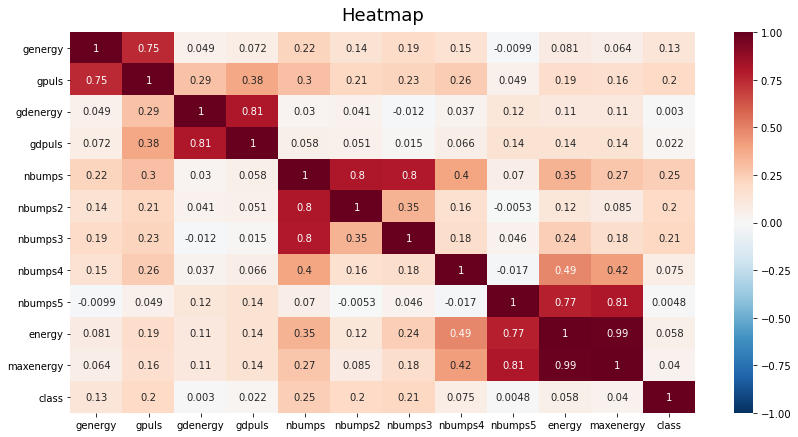

In [ ]:
# Heatmap (eliminando quei 3 attributi)
plt.figure(figsize=(14, 7))
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, cmap='RdBu_r', annot=True)
heatmap.set_title('Heatmap', fontdict={'fontsize':18}, pad=12)

### Scatter plots

Text(0, 0.5, 'Maxnergy')

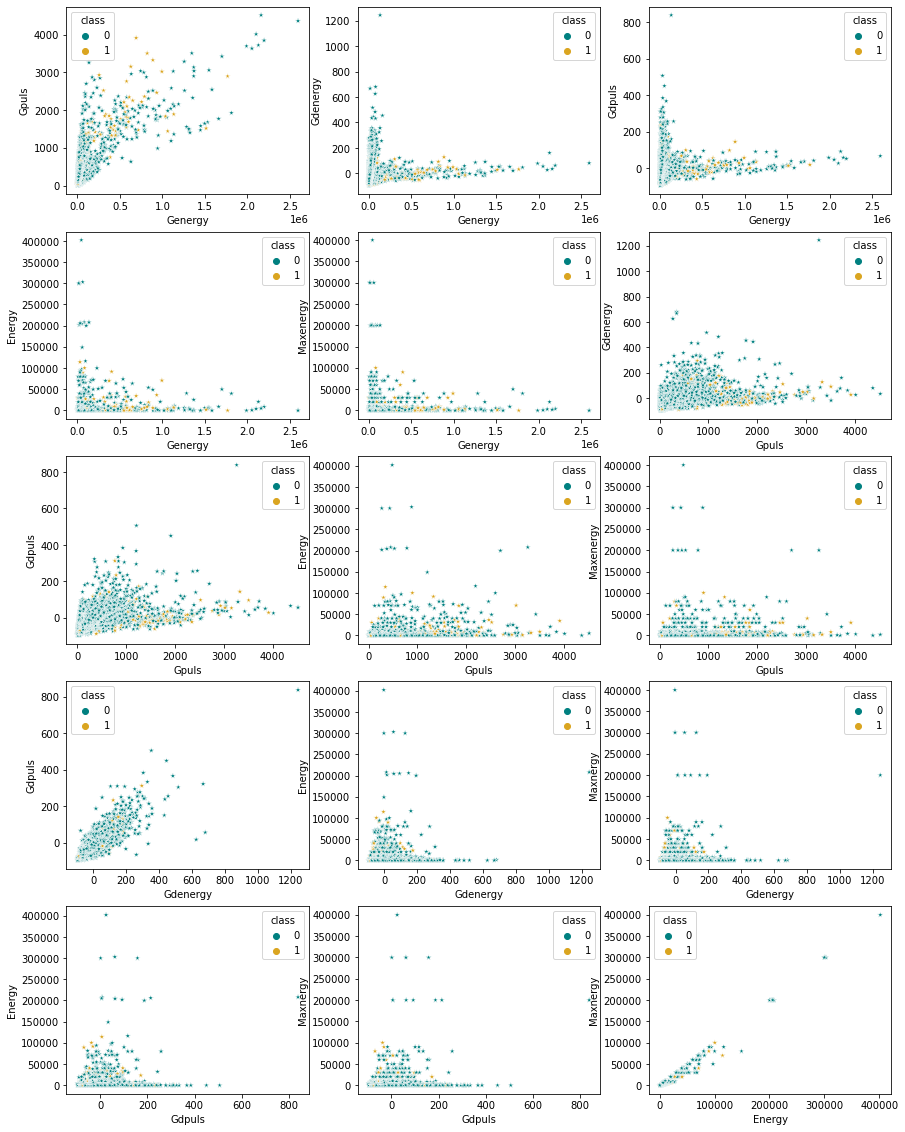

In [ ]:
# TUTTI gli SCATTER PLOTS tra variabili numeriche

fig = plt.figure(figsize=(20, 20)) 
fig_dims = (5, 4)

# Genergy - gpuls scatter plot
plt.subplot2grid(fig_dims, (0, 0))
sns.scatterplot(x='genergy',y='gpuls', palette=['teal','goldenrod'], hue='class', marker='*', data=df)
plt.xlabel('Genergy')
plt.ylabel('Gpuls')

# Genergy - gdenergy scatter plot
plt.subplot2grid(fig_dims, (0, 1))
sns.scatterplot(x='genergy',y='gdenergy', palette=['teal','goldenrod'], hue='class', marker='*', data=df)
plt.xlabel('Genergy')
plt.ylabel('Gdenergy')

# Genergy - gdpuls scatter plot
plt.subplot2grid(fig_dims, (0, 2))
sns.scatterplot(x='genergy',y='gdpuls', palette=['teal','goldenrod'], hue='class', marker='*', data=df)
plt.xlabel('Genergy')
plt.ylabel('Gdpuls')

# Genergy - energy scatter plot
plt.subplot2grid(fig_dims, (1, 0))
sns.scatterplot(x='genergy',y='energy', palette=['teal','goldenrod'], hue='class', marker='*', data=df)
plt.xlabel('Genergy')
plt.ylabel('Energy')

# Genergy - maxenergy scatter plot
plt.subplot2grid(fig_dims, (1, 1))
sns.scatterplot(x='genergy',y='maxenergy', palette=['teal','goldenrod'], hue='class', marker='*', data=df)
plt.xlabel('Genergy')
plt.ylabel('Maxenergy')

# Gpuls - gdenergy scatter plot
plt.subplot2grid(fig_dims, (1, 2))
sns.scatterplot(x='gpuls',y='gdenergy', palette=['teal','goldenrod'], hue='class', marker='*', data=df)
plt.xlabel('Gpuls')
plt.ylabel('Gdenergy')

# Gpuls - gdpuls scatter plot
plt.subplot2grid(fig_dims, (2, 0))
sns.scatterplot(x='gpuls',y='gdpuls', palette=['teal','goldenrod'], hue='class', marker='*', data=df)
plt.xlabel('Gpuls')
plt.ylabel('Gdpuls')

# Gpuls - energy scatter plot
plt.subplot2grid(fig_dims, (2, 1))
sns.scatterplot(x='gpuls',y='energy', palette=['teal','goldenrod'], hue='class', marker='*', data=df)
plt.xlabel('Gpuls')
plt.ylabel('Energy')

# Gpuls - maxenergy scatter plot
plt.subplot2grid(fig_dims, (2, 2))
sns.scatterplot(x='gpuls',y='maxenergy', palette=['teal','goldenrod'], hue='class', marker='*', data=df)
plt.xlabel('Gpuls')
plt.ylabel('Maxenergy')

# Gdenergy - gdpuls scatter plot
plt.subplot2grid(fig_dims, (3, 0))
sns.scatterplot(x='gdenergy',y='gdpuls', palette=['teal','goldenrod'], hue='class', marker='*', data=df)
plt.xlabel('Gdenergy')
plt.ylabel('Gdpuls')

# Gdenergy - energy scatter plot
plt.subplot2grid(fig_dims, (3, 1))
sns.scatterplot(x='gdenergy',y='energy', palette=['teal','goldenrod'], hue='class', marker='*', data=df)
plt.xlabel('Gdenergy')
plt.ylabel('Energy')

# Gdenergy - maxenergy scatter plot
plt.subplot2grid(fig_dims, (3, 2))
sns.scatterplot(x='gdenergy',y='maxenergy', palette=['teal','goldenrod'], hue='class', marker='*', data=df)
plt.xlabel('Gdenergy')
plt.ylabel('Maxnergy')

# Gdpuls - energy scatter plot
plt.subplot2grid(fig_dims, (4, 0))
sns.scatterplot(x='gdpuls',y='energy', palette=['teal','goldenrod'], hue='class', marker='*', data=df)
plt.xlabel('Gdpuls')
plt.ylabel('Energy')

# Gdpuls - maxenergy scatter plot
plt.subplot2grid(fig_dims, (4, 1))
sns.scatterplot(x='gdpuls',y='maxenergy', palette=['teal','goldenrod'], hue='class', marker='*', data=df)
plt.xlabel('Gdpuls')
plt.ylabel('Maxnergy')

# Energy - maxenergy scatter plot
plt.subplot2grid(fig_dims, (4, 2))
sns.scatterplot(x='energy',y='maxenergy', palette=['teal','goldenrod'], hue='class', marker='*', data=df)
plt.xlabel('Energy')
plt.ylabel('Maxnergy')


## Transformations

### genergy

C:\Users\chiar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\chiar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Log Genergy')

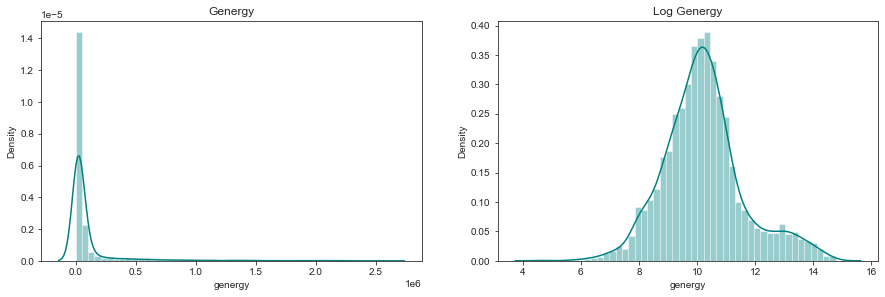

In [ ]:
sns.set_style('ticks')
#sns.set_theme()

fig = plt.figure(figsize=(15, 15)) 
fig_dims = (3, 2)

plt.subplot2grid(fig_dims, (0, 0))
sns.distplot(df['genergy'], color='teal')
plt.title('Genergy')

plt.subplot2grid(fig_dims,(0, 1))
sns.distplot(np.log(df['genergy']), color='teal')
plt.title('Log Genergy')

### gpuls

C:\Users\chiar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\chiar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Log Gpuls')

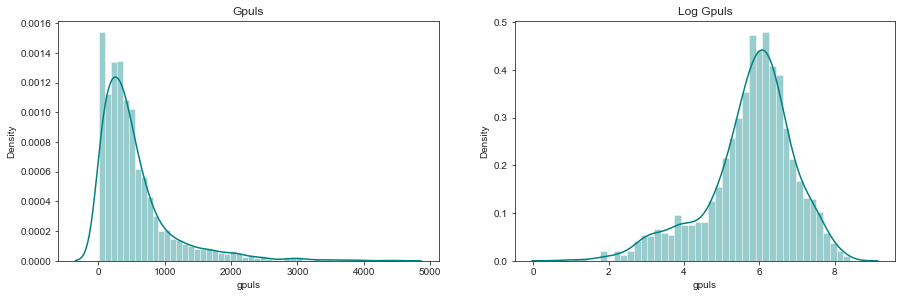

In [ ]:
fig = plt.figure(figsize=(15, 15)) 
fig_dims = (3, 2)

plt.subplot2grid(fig_dims, (0, 0))
sns.distplot(df['gpuls'], color='teal')
plt.title('Gpuls')

plt.subplot2grid(fig_dims, (0, 1))
sns.distplot(np.log(df['gpuls']), color='teal')
plt.title('Log Gpuls')

### Scatter plots Genergy & Gpuls

Text(0.5, 1.0, 'Log Genergy & Gpuls')

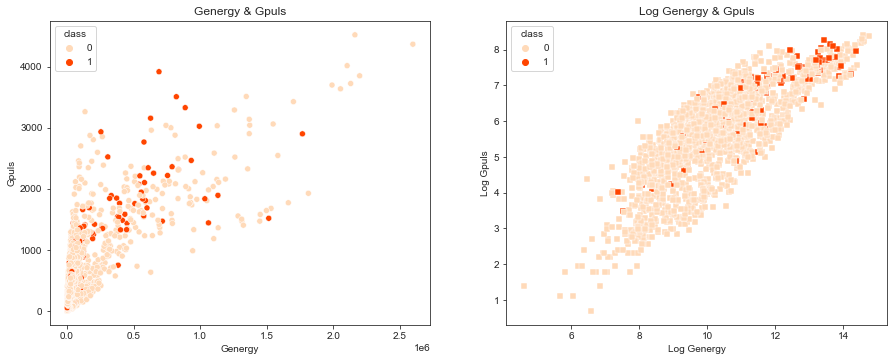

In [ ]:
fig = plt.figure(figsize=(15, 19)) 
fig_dims = (3, 2)

plt.subplot2grid(fig_dims, (0, 0))
sns.scatterplot(x='genergy',y='gpuls', palette=['peachpuff','orangered'], hue='class', data=df)
plt.xlabel('Genergy')
plt.ylabel('Gpuls')
plt.title('Genergy & Gpuls')

# Applying log transform
df['log_t_genergy'] = np.log(df['genergy'])
df['log_t_gpuls'] = np.log(df['gpuls'])

plt.subplot2grid(fig_dims, (0, 1))
sns.scatterplot(x='log_t_genergy',y='log_t_gpuls', palette=['peachpuff','orangered'], marker=',', hue='class', data=df)
plt.xlabel('Log Genergy')
plt.ylabel('Log Gpuls')
plt.title('Log Genergy & Gpuls')

In [ ]:
df.drop(columns=['log_t_genergy', 'log_t_gpuls'], inplace=True)

### gdenergy

C:\Users\chiar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\chiar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'gdenergy')

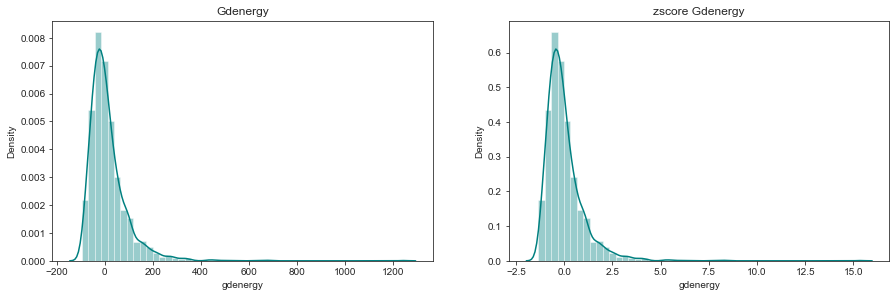

In [ ]:
fig = plt.figure(figsize=(15, 15)) 
fig_dims = (3, 2)

plt.subplot2grid(fig_dims, (0, 0))
sns.distplot(df['gdenergy'], color='teal')    
plt.title('Gdenergy')

# this variable has some negative values so we can't use the log
# so, zscore

plt.subplot2grid(fig_dims,(0, 1))
sns.distplot(stats.zscore(df['gdenergy']), color='teal')
plt.title('zscore Gdenergy')
plt.xlabel('gdenergy')

### gdpuls

C:\Users\chiar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\chiar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'gpuls')

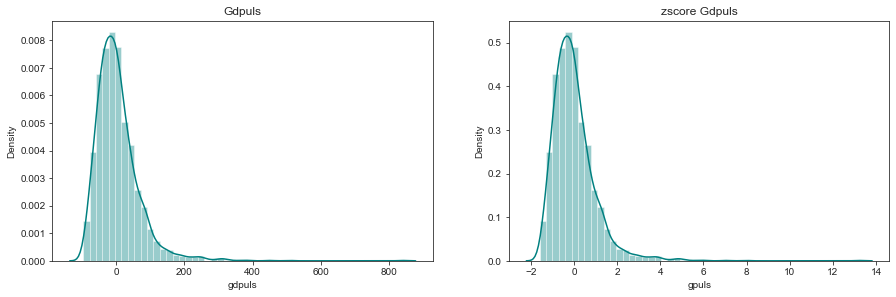

In [ ]:
fig = plt.figure(figsize=(15, 15)) 
fig_dims = (3, 2)

plt.subplot2grid(fig_dims, (0, 0))
sns.distplot(df['gdpuls'], color='teal')
plt.title('Gdpuls')

# normal standardization
plt.subplot2grid(fig_dims, (0, 1))
sns.distplot(stats.zscore(df['gdpuls']), color='teal')
plt.title('zscore Gdpuls')
plt.xlabel('gpuls')

### Scatter plots Gdenergy & Gdpuls

Text(0.5, 1.0, 'zscore Gdenergy & Gdpuls')

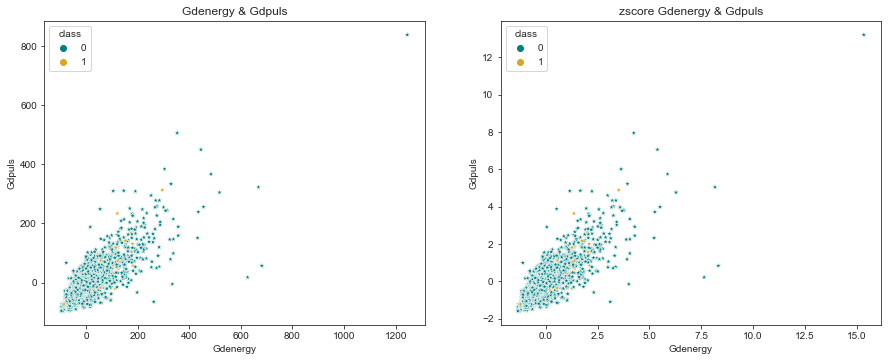

In [ ]:
fig = plt.figure(figsize=(15, 19)) 
fig_dims = (3, 2)

plt.subplot2grid(fig_dims, (0, 0))
sns.scatterplot(x='gdenergy',y='gdpuls', palette=['teal','goldenrod'], hue='class', marker='*', data=df)
plt.xlabel('Gdenergy')
plt.ylabel('Gdpuls')
plt.title('Gdenergy & Gdpuls')

# Applying log transform
df['zscore_gdenergy'] = stats.zscore(df['gdenergy'])
df['zscore_gdpuls'] = stats.zscore(df['gdpuls'])

plt.subplot2grid(fig_dims, (0, 1))
sns.scatterplot(x='zscore_gdenergy',y='zscore_gdpuls', palette=['teal','goldenrod'], hue='class', marker='*', data=df)
plt.xlabel('Gdenergy')
plt.ylabel('Gdpuls')
plt.title('zscore Gdenergy & Gdpuls')

In [ ]:
df.drop(columns=['zscore_gdenergy', 'zscore_gdpuls'], inplace=True)

### energy

C:\Users\chiar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\chiar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Log Energy')

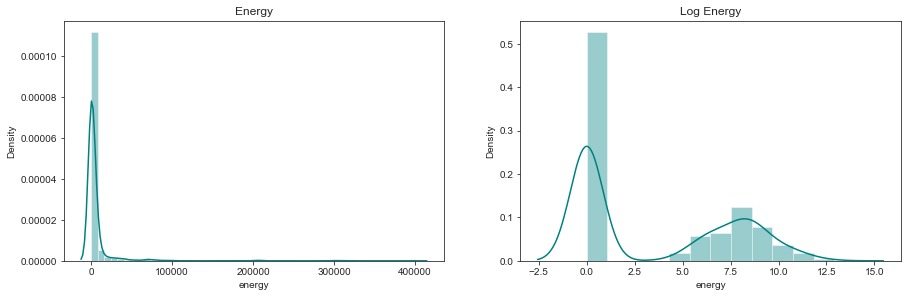

In [ ]:
fig = plt.figure(figsize=(15, 15)) 
fig_dims = (3, 2)

plt.subplot2grid(fig_dims, (0, 0))
sns.distplot(df['energy'], color='teal')
plt.title('Energy')

plt.subplot2grid(fig_dims,(0, 1))
sns.distplot(np.log(df['energy']+1), color='teal')
plt.title('Log Energy')
# add +1 bc there are many 0 values 

### maxenergy

C:\Users\chiar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\chiar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Log Maxenergy')

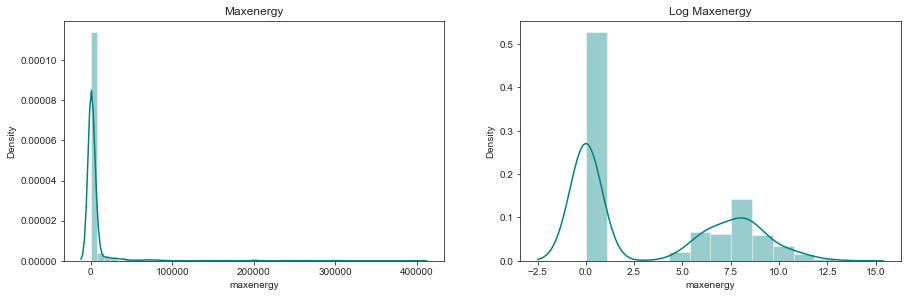

In [ ]:
fig = plt.figure(figsize=(15, 15)) 
fig_dims = (3, 2)

plt.subplot2grid(fig_dims, (0, 0))
sns.distplot(df['maxenergy'], color='teal')
plt.title('Maxenergy')

plt.subplot2grid(fig_dims,(0, 1))
sns.distplot(np.log(df['maxenergy']+1), color='teal')
plt.title('Log Maxenergy')
# add +1 bc there are many 0 values 

### Scatter plots Energy & Maxenergy

Text(0.5, 1.0, 'Log Energy & Maxenergy')

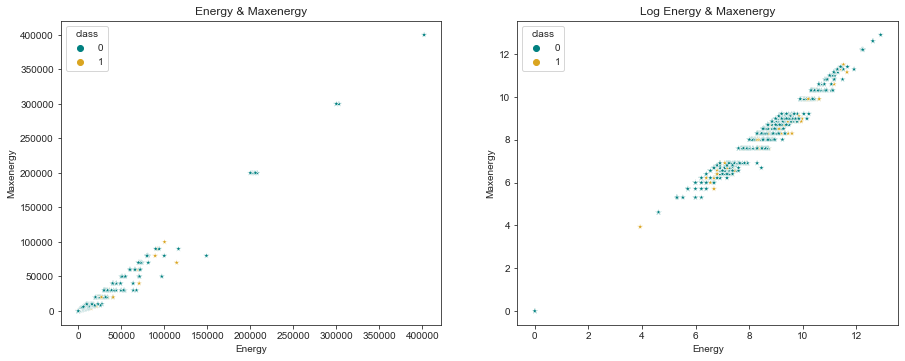

In [ ]:
fig = plt.figure(figsize=(15, 19)) 
fig_dims = (3, 2)

plt.subplot2grid(fig_dims, (0, 0))
sns.scatterplot(x='energy',y='maxenergy', palette=['teal','goldenrod'], hue='class', marker='*', data=df)
plt.xlabel('Energy')
plt.ylabel('Maxenergy')
plt.title('Energy & Maxenergy')

# Applying log transform
df['log_t_energy'] = np.log(df['energy']+1)
df['log_t_maxenergy'] = np.log(df['maxenergy']+1)

plt.subplot2grid(fig_dims, (0, 1))
sns.scatterplot(x='log_t_energy',y='log_t_maxenergy', palette=['teal','goldenrod'], hue='class', marker='*', data=df)
plt.xlabel('Energy')
plt.ylabel('Maxenergy')
plt.title('Log Energy & Maxenergy')

In [ ]:
df.drop(columns=['log_t_energy', 'log_t_maxenergy'], inplace=True)

## nbumps

C:\Users\chiar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


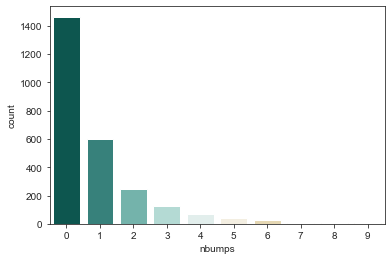

C:\Users\chiar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


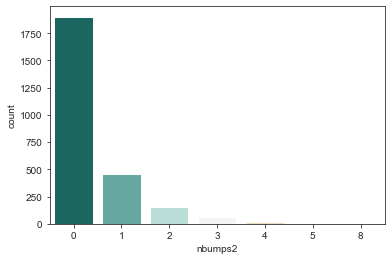

C:\Users\chiar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


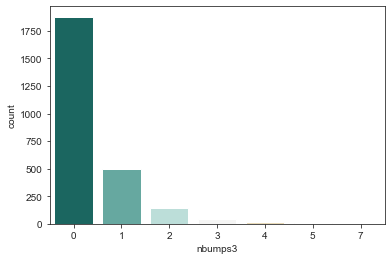

C:\Users\chiar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


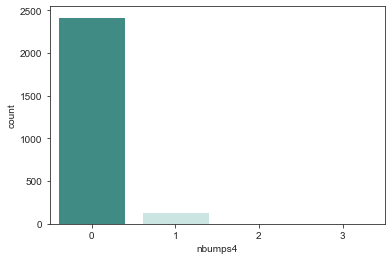

C:\Users\chiar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


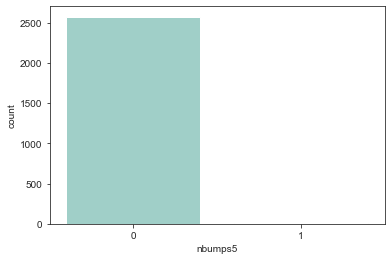

KeyError: 'nbumps6'

In [ ]:
col_list_discrete = ['nbumps', 'nbumps2', 'nbumps3', 'nbumps4', 'nbumps5', 'nbumps6', 'nbumps7', 'nbumps89']
for col in col_list_discrete:
    sns.countplot(df[col], palette='BrBG_r')
    plt.show()
# non funziona (da cambiare) 

In [ ]:
num_attr = ['genergy','gpuls','gdenergy','gdpuls','nbumps','nbumps2','nbumps3','nbumps4','nbumps5','nbumps6','nbumps7',
            'nbumps89','energy','maxenergy']
np.cov(df[num_attr])


array([[16476395.34065934, 15647328.92307692,  8744428.94505494, ...,
        29184969.6923077 , 17472184.87912088, 13814527.58241758],
       [15647328.92307692, 15381789.07692308,  8306293.30769231, ...,
        27694040.38461539, 16582608.        , 13112212.30769231],
       [ 8744428.94505494,  8306293.30769231,  4641112.02747253, ...,
        15488281.8076923 ,  9272713.25274725,  7331594.47802198],
       ...,
       [29184969.6923077 , 27694040.38461539, 15488281.8076923 , ...,
        51715235.5       , 30958804.15384616, 24476965.57692307],
       [17472184.87912088, 16582608.        ,  9272713.25274725, ...,
        30958804.15384616, 18533672.26373626, 14653361.42857143],
       [13814527.58241758, 13112212.30769231,  7331594.47802198, ...,
        24476965.57692307, 14653361.42857143, 11585492.9945055 ]])

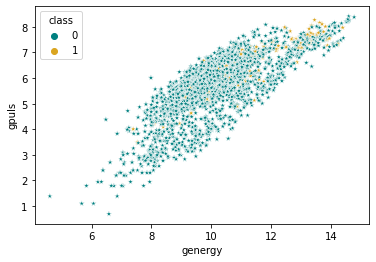

In [ ]:
sns.scatterplot(x=np.log(df['genergy']),y=np.log(df['gpuls']), palette=['teal','goldenrod'], hue='class', marker='*', data=df)



Text(0.5, 1.0, 'Genergy & Gpuls')

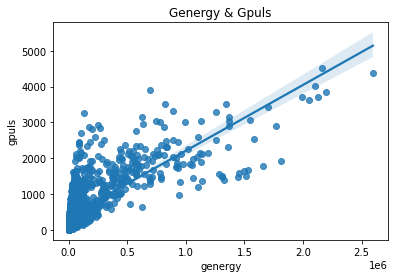

In [ ]:
sns.regplot(x='genergy', y='gpuls', data=df)
plt.title('Genergy & Gpuls')

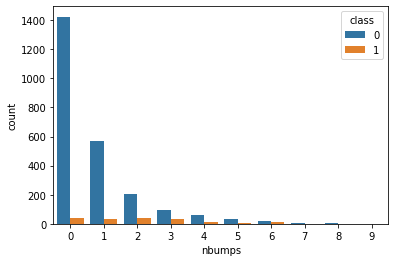

In [ ]:
sns.countplot(x='nbumps', hue='class', data=df)

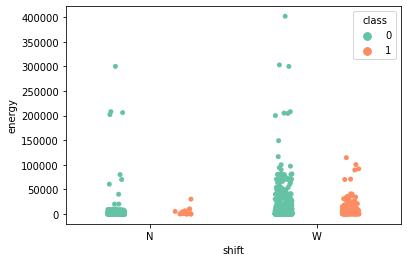

In [ ]:
sns.stripplot(x="shift", y="energy", hue="class", data=df, palette="Set2", dodge=True)

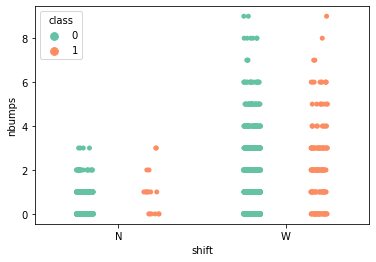

In [ ]:
sns.stripplot(x="shift", y="nbumps", hue="class", data=df, palette="Set2", dodge=True)

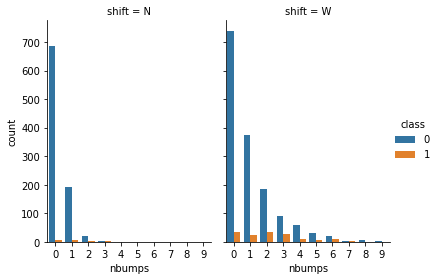

In [ ]:
sns.catplot(x="nbumps", #y="nbumps",
                hue="class", col="shift",
                data=df, kind="count",
                height=4, aspect=.7)

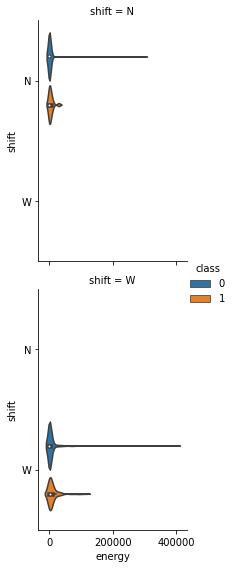

In [ ]:
sns.catplot(y="shift", x="energy",
                hue="class", row="shift",
                data=df, kind="violin",
                height=4, aspect=.7)

**HIERARCHICAL CLUSTERING** 

In [6]:
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster


In [ ]:
df.head()

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,hazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
0,a,a,N,15180,48,-72,-72,a,0,0,0,0,0,0,0,0,0,0,0
1,a,a,N,14720,33,-70,-79,a,1,0,1,0,0,0,0,0,2000,2000,0
2,a,a,N,8050,30,-81,-78,a,0,0,0,0,0,0,0,0,0,0,0
3,a,a,N,28820,171,-23,40,a,1,0,1,0,0,0,0,0,3000,3000,0
4,a,a,N,12640,57,-63,-52,a,0,0,0,0,0,0,0,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2584 entries, 0 to 2583
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   genergy   2584 non-null   int64
 1   gpuls     2584 non-null   int64
 2   gdenergy  2584 non-null   int64
 3   gdpuls    2584 non-null   int64
 4   nbumps    2584 non-null   int64
dtypes: int64(5)
memory usage: 101.1 KB


In [ ]:
num_attr = ['genergy','gpuls','gdenergy','gdpuls','nbumps','nbumps2','nbumps3','nbumps4','nbumps5','nbumps6','nbumps7',
            'nbumps89','energy','maxenergy'] 
carlo_attr = ['genergy','gpuls','gdenergy','gdpuls','nbumps','energy']           
cat_attr = ['seismic','seismoacoustic','shift','hazard']

In [ ]:
#per poterlo fare è necessario che gli attributi numerici diventino float 


#facciamo un clustering su gli atrributi numerici 
np_num = df[carlo_attr].to_numpy()

In [ ]:

#ritorna tutta la serie raccolta
distance_matrices = {
    "euclidean": pdist(np_num, metric='euclidean'),
    # Squared euclidean
    "sqeuclidean": pdist(np_num, metric='sqeuclidean'),
    "chebyshev": pdist(np_num, metric='chebyshev')
}

In [ ]:
def run_experiments(metric):
  distance_matrix = distance_matrices[metric]
  return {
      "complete": linkage(distance_matrix, method="complete", metric=metric),
      "single": linkage(distance_matrix, method="single", metric=metric),
      "average": linkage(distance_matrix, method="average", metric=metric),
      "weighted": linkage(distance_matrix, method="weighted", metric=metric),
      "centroid": linkage(distance_matrix, method="centroid", metric=metric),
      "median": linkage(distance_matrix, method="median", metric=metric),
      "ward": linkage(distance_matrix, method="ward", metric=metric)
  }

In [ ]:
results = {
    "euclidean": run_experiments("euclidean"),
    # Squared euclidean
    "sqeuclidean": run_experiments("sqeuclidean"),
    "chebyshev": run_experiments("chebyshev")
}

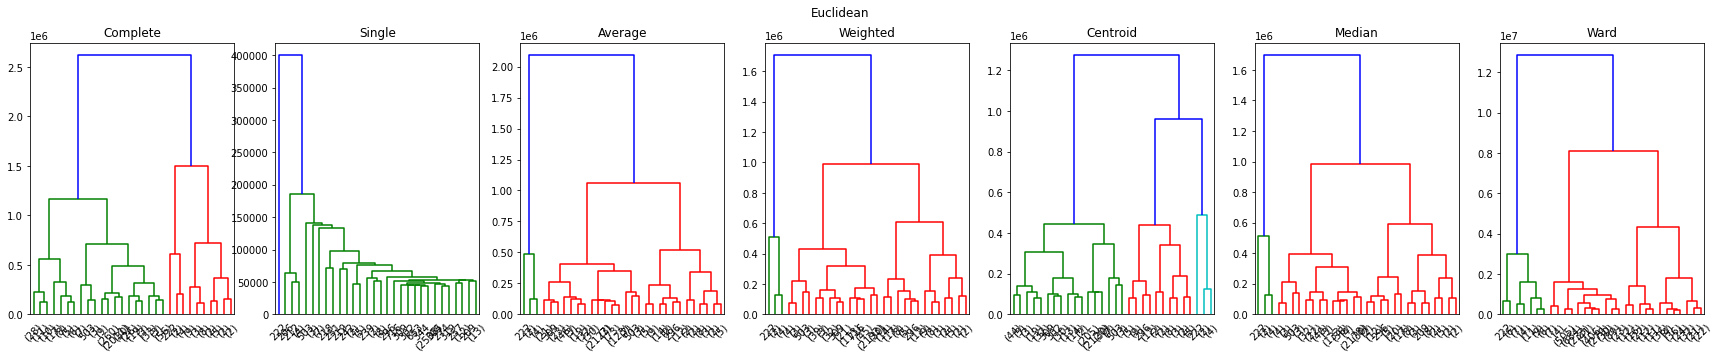

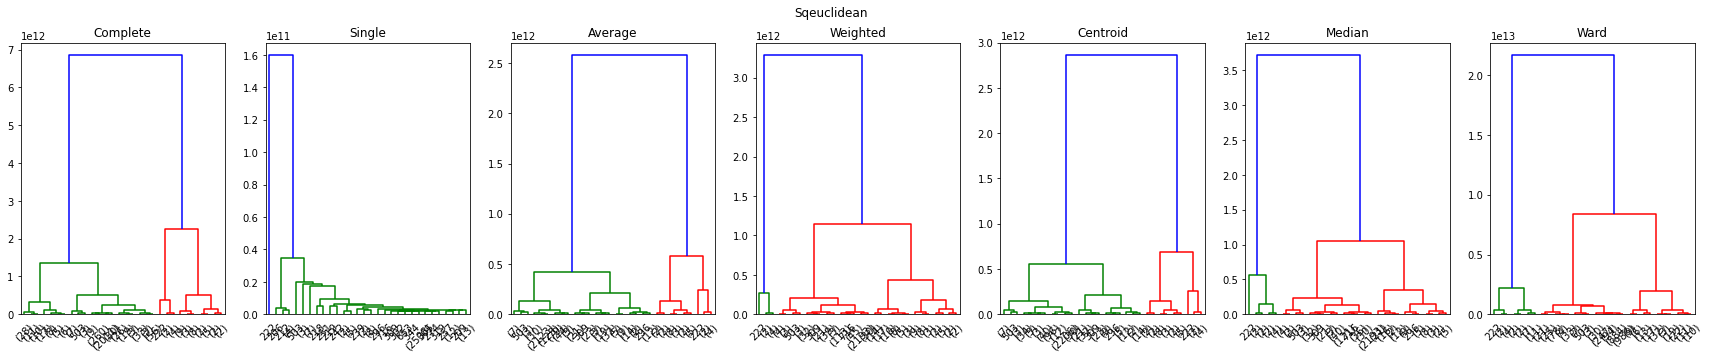

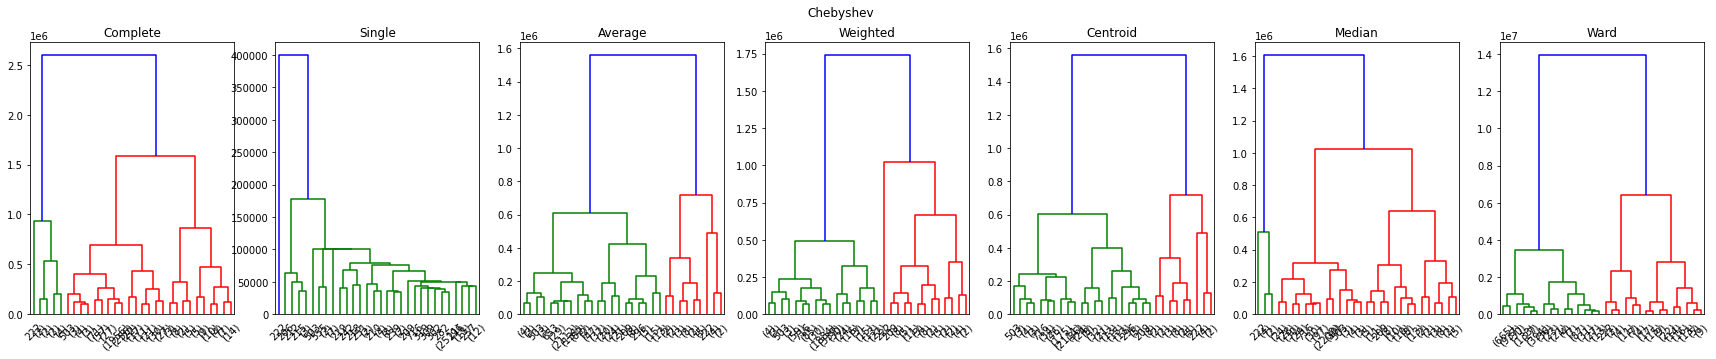

In [ ]:
for metric in results:
  fig, axs = plt.subplots(1, 7, figsize = (30, 5))
  plt.suptitle(metric.capitalize())
  for method, ax in zip(results[metric], axs):
    ax.set_title(method.capitalize())
    dendrogram(results[metric][method], truncate_mode='lastp', ax = ax)
  plt.show()

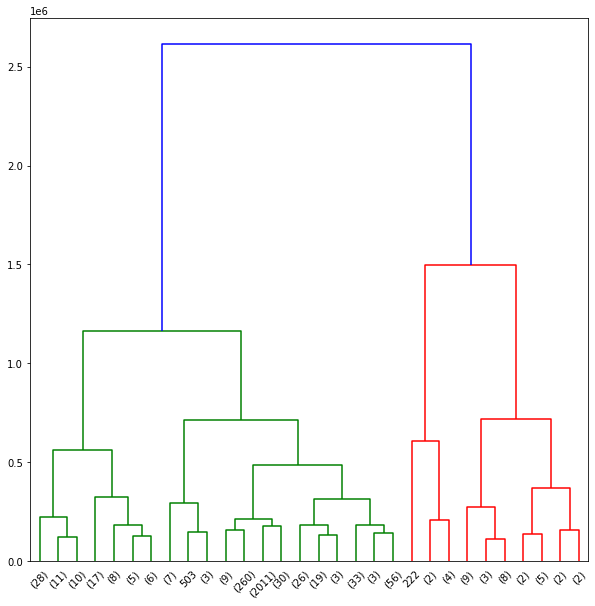

In [ ]:
#Il migliore sembra questo, ma non so il perchè 
fig, axs = plt.subplots(1, 1, figsize = (10, 10))
dendrogram(results["euclidean"]["complete"], truncate_mode='lastp', ax = axs)
plt.show()


In [ ]:
#non so a cosa serva
clusters = fcluster(results["euclidean"]["complete"], t=10, criterion="distance")


DBSCAN 

Estimated number of clusters: 1
Estimated number of noise points: 51


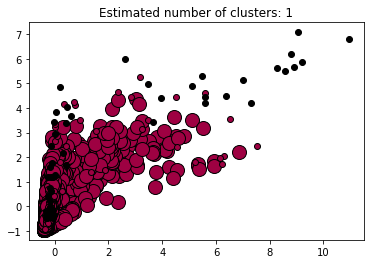

In [ ]:
X = StandardScaler().fit_transform(np_num)

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=1.9, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

Estimated number of clusters: 3
Estimated number of noise points: 18
Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626


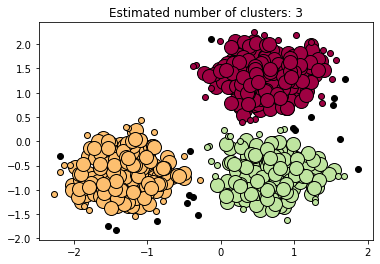

In [7]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

X = StandardScaler().fit_transform(X)

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
print(
    "Adjusted Mutual Information: %0.3f"
    % metrics.adjusted_mutual_info_score(labels_true, labels)
)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

In [ ]:
dbscan = DBSCAN(eps=0.15, min_samples=3)
# eseguo fitting e predizione in una volta sola
y_dbscan = dbscan.fit_predict(np_num)



In [8]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [9]:
df.head()

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,hazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
0,a,a,N,15180,48,-72,-72,a,0,0,0,0,0,0,0,0,0,0,0
1,a,a,N,14720,33,-70,-79,a,1,0,1,0,0,0,0,0,2000,2000,0
2,a,a,N,8050,30,-81,-78,a,0,0,0,0,0,0,0,0,0,0,0
3,a,a,N,28820,171,-23,40,a,1,0,1,0,0,0,0,0,3000,3000,0
4,a,a,N,12640,57,-63,-52,a,0,0,0,0,0,0,0,0,0,0,0


In [18]:
Clus_dataSet = df[['genergy', 'gpuls','gdpuls', 'nbumps', 'energy', 'gdenergy']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = np.array(Clus_dataSet, dtype=np.float64)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)
# Compute DBSCAN
db = DBSCAN(eps=0.4, min_samples=9).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
df['Clus_Db']=labels
realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels))
# A sample of clusters
print(df[['genergy','nbumps']].head())
# Number of Labels
print("number of labels: ", set(labels))

   genergy  nbumps
0    15180       0
1    14720       1
2     8050       0
3    28820       1
4    12640       0
number of labels:  {0, 1, 2, 3, 4, -1}


No handles with labels found to put in legend.


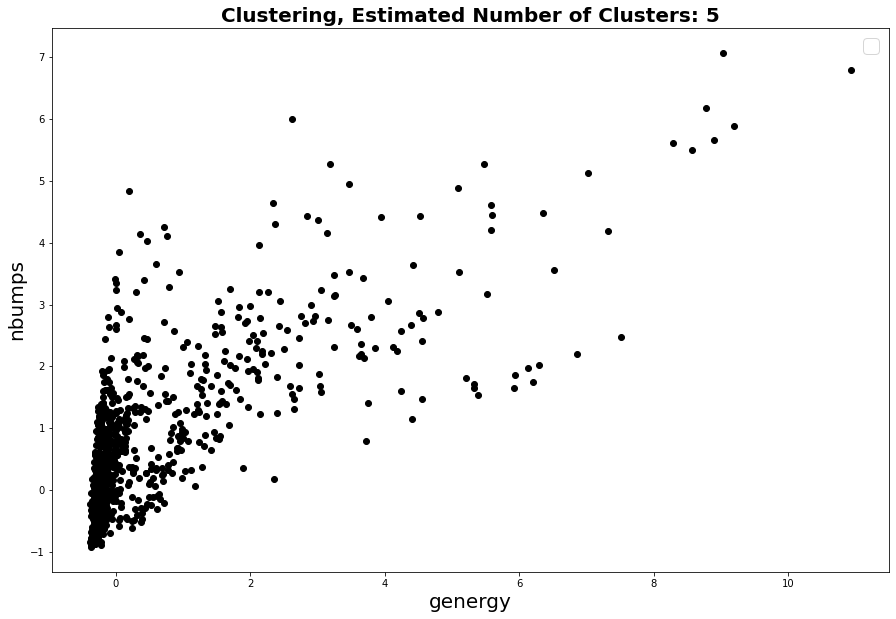

In [12]:
# Black removed and is used for noise instead
plt.figure(figsize=(15,10))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
 for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
      # Black used for noise.
        col = [0, 0, 0, 1]
class_member_mask = (labels == k)

xy = Clus_dataSet[class_member_mask & core_samples_mask]
plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

xy = Clus_dataSet[class_member_mask & ~core_samples_mask]
plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)
plt.title('Clustering, Estimated Number of Clusters: %d' % realClusterNum, fontweight='bold',fontsize=20)
plt.xlabel('genergy',fontsize=20)
plt.ylabel('nbumps',fontsize=20)
plt.legend(fontsize=20)
plt.show()

In [21]:
for clust_number in set(labels):
    clust_set = df[df.Clus_Db == clust_number]
    if clust_number != -1:
        print ("Cluster "+str(clust_number)+', Avg genergy: '+ str(round(np.mean(clust_set.genergy)))+\
               ', Avg Spending Score: '+ str(round(np.mean(clust_set['nbumps'])))+\
               ', Count: '+ str(np.count_nonzero(clust_set.index)))

Cluster 0, Avg genergy: 19820, Avg Spending Score: 0, Count: 1271
Cluster 1, Avg genergy: 29816, Avg Spending Score: 1, Count: 370
Cluster 2, Avg genergy: 34852, Avg Spending Score: 2, Count: 71
Cluster 3, Avg genergy: 31295, Avg Spending Score: 3, Count: 23
Cluster 4, Avg genergy: 21967, Avg Spending Score: 0, Count: 6


In [19]:
inf = clust_number[0]
print(inf)

IndexError: ignored